<a href="https://colab.research.google.com/github/josetaco/Proyectos/blob/main/2_Parte_Inferencia_Estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos las librerias que son necesarias
import pandas as pd
import numpy as np
import seaborn as sns # visualización
import statistics as stats # estadística
from statsmodels.graphics.gofplots import qqplot  #Grafico de la curva normal
from scipy.stats import shapiro 
from scipy.stats import kstest  
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler # Para normalizar varaiables numericas
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Gráficos

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')
# Preprocesado y modelado
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
#Cargomos la base de datos de tratamiento
from google.colab import files
files.upload()

Saving Data_Nutricion.xlsx to Data_Nutricion.xlsx


{'Data_Nutricion.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00A7\x82\xcfn\x01\x00\x00\x04\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [ ]:
#Visualizamos la base de datos
data_nutricion = pd.read_excel('Data_Nutricion.xlsx', sheet_name='Hoja1')
data_nutricion.head()

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,Persona 1,155.7,16,71.2,35.7,29.576170,90.0,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0
1,Persona 2,166.5,16,61.0,31.8,22.364707,80.9,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0
2,Persona 3,151.3,16,49.1,30.5,21.623567,72.0,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0
3,Persona 4,151.7,16,54.6,32.6,23.117479,74.4,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0
4,Persona 5,160.3,16,58.0,30.1,22.260196,79.6,97.9,0.813075,0.496569,30.276688,40.439521,10.0,19.0,20.0,19.0


In [ ]:
data_nutricion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Individuo                    652 non-null    object 
 1   talla                        652 non-null    float64
 2   edad                         652 non-null    int64  
 3   peso_kg                      652 non-null    float64
 4   circun_cuello                652 non-null    float64
 5   IMC                          652 non-null    float64
 6   circun_cintura               652 non-null    float64
 7   cadera                       652 non-null    float64
 8   ind_cintura_cadera           652 non-null    float64
 9   ind_cintura_estatura         652 non-null    float64
 10  por_grasa_corporal           652 non-null    float64
 11  masa_corporal_magra_kg       652 non-null    float64
 12  pliegue_cutaneo_BICEPS       652 non-null    float64
 13  pliegue_cutaneo_TRIC

Las variables tiene los datos completos (652), esto quiere decir que no se va ha emplear algun  metodo de imputacion

In [ ]:
#Seleccionamos las variables numericas que se van a tratar
data_nutricion_num = data_nutricion.loc[:, ['cadera','IMC','ind_cintura_estatura','masa_corporal_magra_kg','pliegue_cutaneo_SUPRAILIACO']] 
data_nutricion_num.head()

,cadera,IMC,ind_cintura_estatura,masa_corporal_magra_kg,pliegue_cutaneo_SUPRAILIACO
0,98.0,29.576170,0.578035,45.250304,34.0
1,100.5,22.364707,0.485886,43.437664,22.0
2,86.0,21.623567,0.475876,34.435097,17.0
3,88.4,23.117479,0.490442,39.384269,18.0
4,97.9,22.260196,0.496569,40.439521,19.0


In [ ]:
# Observamos si existe la presencia de datos perdidos
data_nutricion_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cadera                       652 non-null    float64
 1   IMC                          652 non-null    float64
 2   ind_cintura_estatura         652 non-null    float64
 3   masa_corporal_magra_kg       652 non-null    float64
 4   pliegue_cutaneo_SUPRAILIACO  652 non-null    float64
dtypes: float64(5)
memory usage: 25.6 KB


No se realiza ninguna imputacion por que no hay datos nullos

##Realizamos los graficos para visualizar el comportamientos de las variables

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


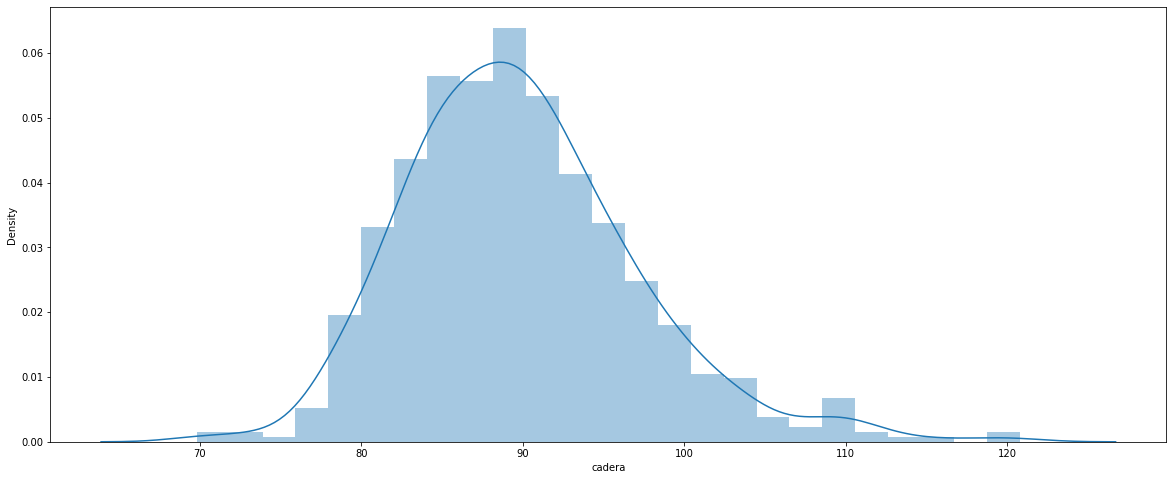

In [ ]:
plt.figure(figsize=(20,8))
sns.distplot(data_nutricion_num['cadera'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


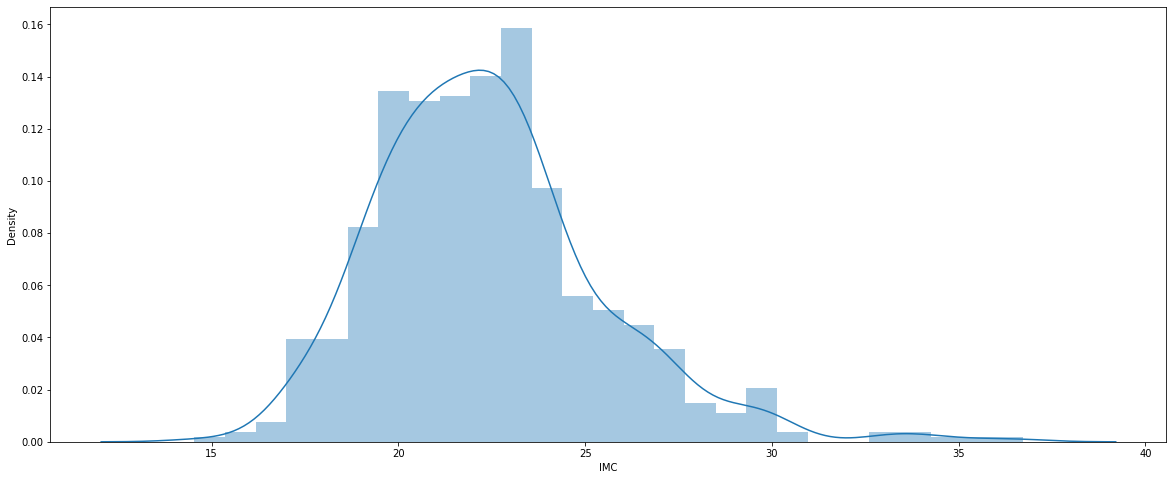

In [ ]:
plt.figure(figsize=(20,8))
sns.distplot(data_nutricion_num['IMC'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


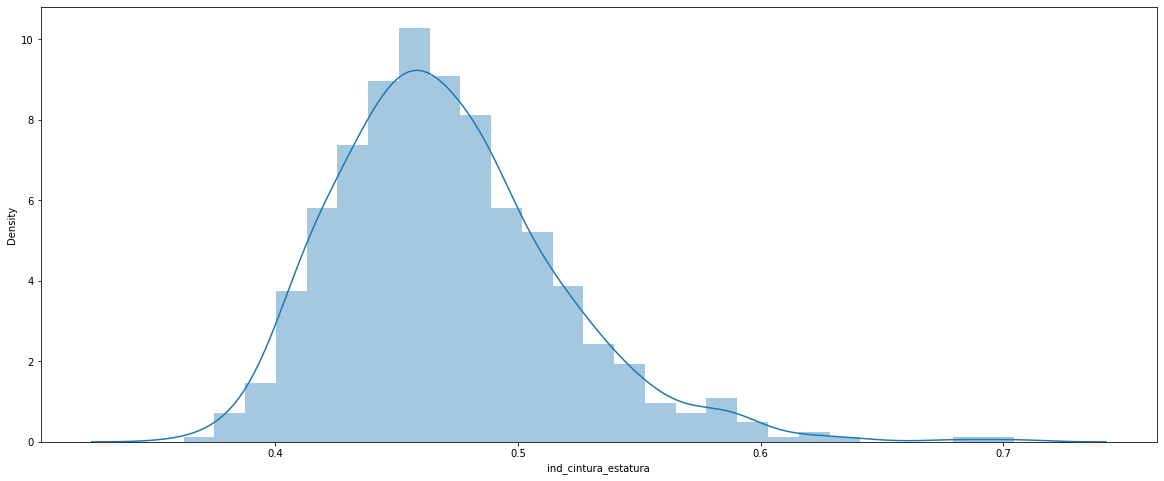

In [ ]:
plt.figure(figsize=(20,8))
sns.distplot(data_nutricion_num['ind_cintura_estatura'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


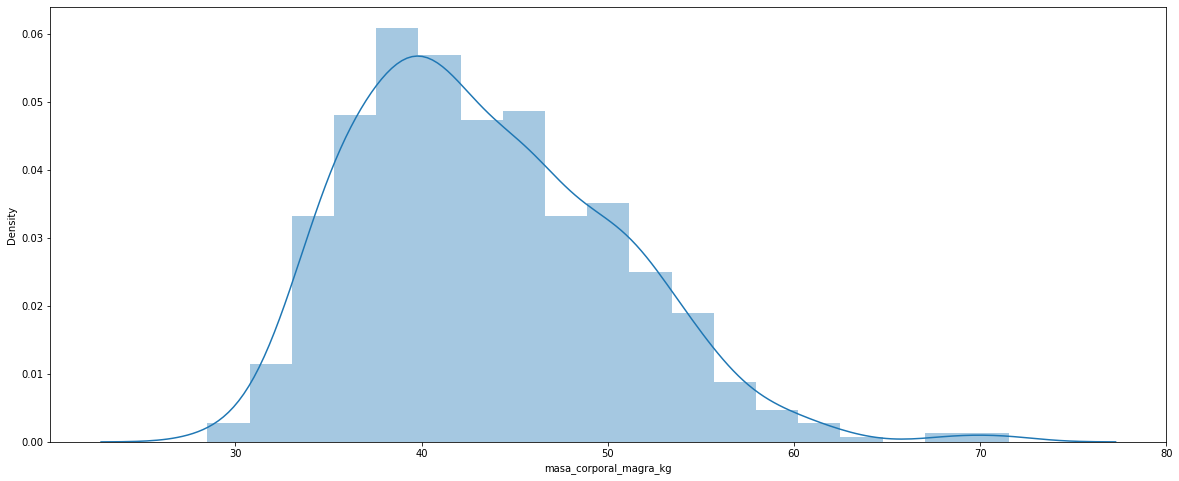

In [ ]:

plt.figure(figsize=(20,8))
sns.distplot(data_nutricion_num['masa_corporal_magra_kg'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


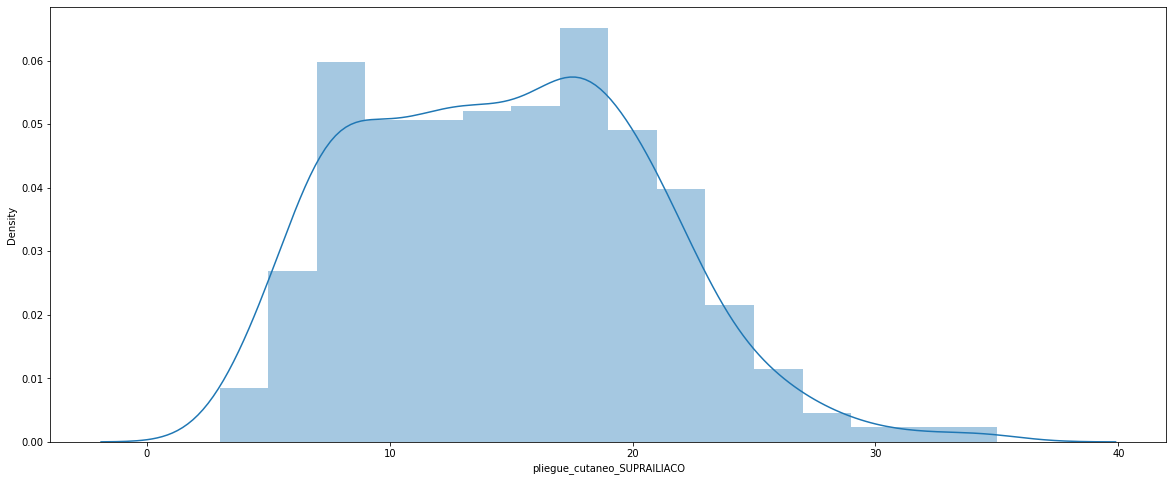

In [ ]:
plt.figure(figsize=(20,8))
sns.distplot(data_nutricion_num['pliegue_cutaneo_SUPRAILIACO'])
plt.show()

Las graficas muestran que las variables tiene un comportamiento visualmente parecida a una distribucion normal

ANALISAMOS LAS VARIABLES PARA PONER LIMITES EVITANDO ASI DATOS OUTLIERS

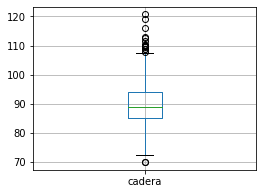

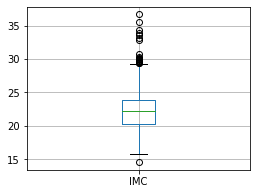

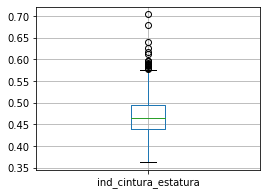

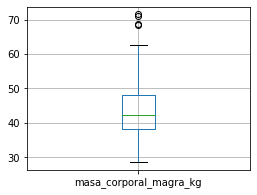

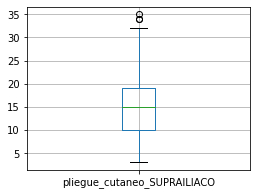

In [ ]:
# Mediante una observacion y analisis individual de las variables se van ha asignar limites a todas las variables por la presencias de datos outliers

data_nutricion_num.boxplot(column="cadera",
	figsize=(4,3))
plt.show()
data_nutricion_num.boxplot(column="IMC",
	figsize=(4,3))
plt.show()
data_nutricion_num.boxplot(column="ind_cintura_estatura",
	figsize=(4,3))
plt.show()
data_nutricion_num.boxplot(column="masa_corporal_magra_kg",
	figsize=(4,3))
plt.show()
data_nutricion_num.boxplot(column="pliegue_cutaneo_SUPRAILIACO",
	figsize=(4,3))
plt.show()


In [ ]:
# corrigiendo las variables numèricas 

Elim=data_nutricion_num[data_nutricion_num["cadera"]>105].index
data_nutricion_num=data_nutricion_num.drop(Elim,inplace=False)
Elim=data_nutricion_num[data_nutricion_num["IMC"]>25].index
data_nutricion_num=data_nutricion_num.drop(Elim,inplace=False)

data_nutricion_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 1 to 651
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cadera                       545 non-null    float64
 1   IMC                          545 non-null    float64
 2   ind_cintura_estatura         545 non-null    float64
 3   masa_corporal_magra_kg       545 non-null    float64
 4   pliegue_cutaneo_SUPRAILIACO  545 non-null    float64
dtypes: float64(5)
memory usage: 25.5 KB


El numero de datos de las varaibles se ha reducia a 545 registros

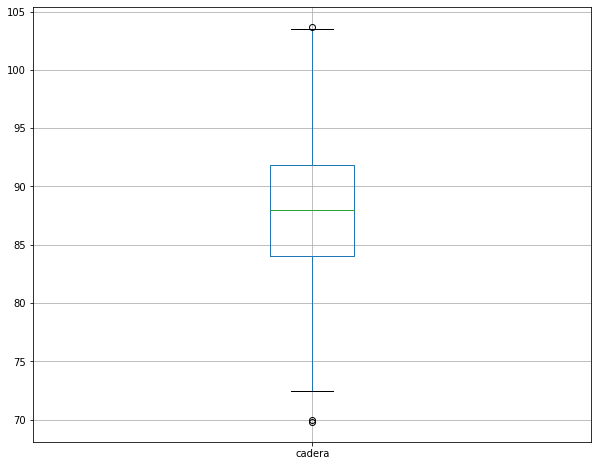

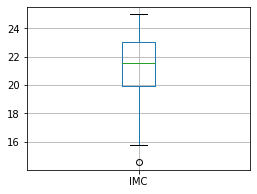

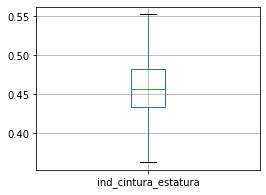

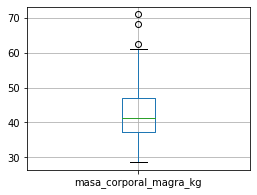

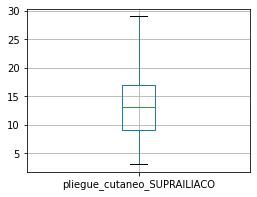

In [ ]:
#Visualizamos los variables con los nuevos limites
data_nutricion_num.boxplot(column="cadera",
	figsize=(4,3))
plt.show()
data_nutricion_num.boxplot(column="IMC",
	figsize=(4,3))
plt.show()
data_nutricion_num.boxplot(column="ind_cintura_estatura",
	figsize=(4,3))
plt.show()
data_nutricion_num.boxplot(column="masa_corporal_magra_kg",
	figsize=(4,3))
plt.show()
data_nutricion_num.boxplot(column="pliegue_cutaneo_SUPRAILIACO",
	figsize=(4,3))
plt.show()


Ahora que eliminamos nuestros datos datos outliers, se puede trabajar mejor


## PRUEBA DE NORMALIDAD


In [ ]:

#Variable: Cadera

stat2, p2 = kstest(data_nutricion_num['cadera'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))


Estadisticos=1.000, p-value=0.000


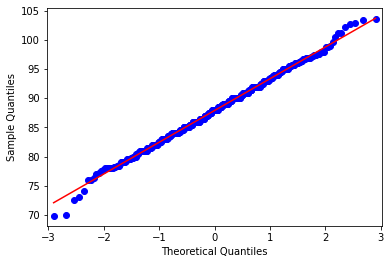

In [ ]:

qqplot(data_nutricion_num['cadera'] , line='s')
plt.show()

In [ ]:
#Prueba de normalidad para 
#Variable: IMC

stat2, p2 = kstest(data_nutricion_num['IMC'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


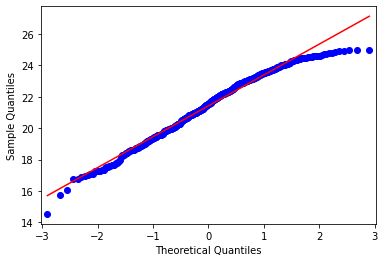

In [ ]:
qqplot(data_nutricion_num['IMC'] , line='s')
plt.show()

In [ ]:

#Variable: ind_cintura_estatura

stat2, p2 = kstest(data_nutricion_num['ind_cintura_estatura'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.645, p-value=0.000


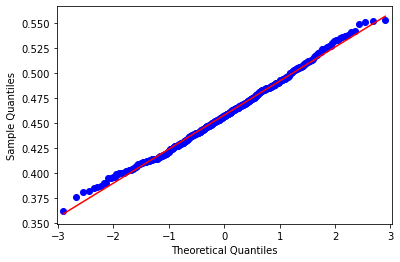

In [ ]:
qqplot(data_nutricion_num['ind_cintura_estatura'] , line='s')
plt.show()

In [ ]:

#Variable: masa_corporal_magra_kg

stat2, p2 = kstest(data_nutricion_num['masa_corporal_magra_kg'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


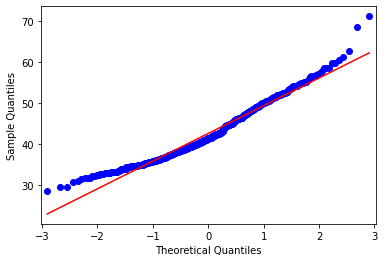

In [ ]:
qqplot(data_nutricion_num['masa_corporal_magra_kg'] , line='s')
plt.show()

In [ ]:

#Variable: pliegue_cutaneo_SUPRAILIACO

stat2, p2 = kstest(data_nutricion_num['pliegue_cutaneo_SUPRAILIACO'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.999, p-value=0.000


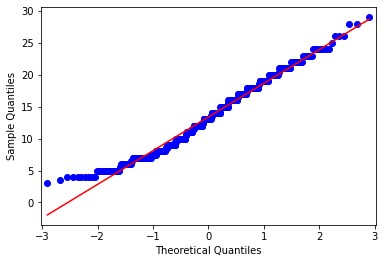

In [ ]:
qqplot(data_nutricion_num['pliegue_cutaneo_SUPRAILIACO'] , line='s')
plt.show()

# Observación:
Se puede afirmar que para las 5 variables no tienen una distribucion normal.
Primero no esta siguiendo el trazo rojo, ademas el p-value es menor que 0.05

##Normalizacion

In [ ]:
scaler = MinMaxScaler()
data_nutricion_num2_norm = scaler.fit_transform(data_nutricion_num)
data_nutricion_num2_norm

array([[0.90560472, 0.74864018, 0.64922686, 0.35071751, 0.73076923],
       [0.47787611, 0.67774971, 0.59663312, 0.13937563, 0.53846154],
       [0.54867257, 0.82064327, 0.67316311, 0.25556106, 0.57692308],
       ...,
       [0.52212389, 0.8220392 , 0.7561753 , 0.14599833, 0.5       ],
       [0.77286136, 0.78735297, 0.99632048, 0.34557462, 0.57692308],
       [0.71386431, 0.81641039, 0.69012961, 0.24349252, 0.80769231]])

In [ ]:
# El array convertimos en DataFrame
data_nutricion_num2_norm = pd.DataFrame(
    data=data_nutricion_num2_norm,
    columns=['cadera','IMC','ind_cintura_estatura','masa_corporal_magra_kg','pliegue_cutaneo_SUPRAILIACO'])
data_nutricion_num2_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cadera                       545 non-null    float64
 1   IMC                          545 non-null    float64
 2   ind_cintura_estatura         545 non-null    float64
 3   masa_corporal_magra_kg       545 non-null    float64
 4   pliegue_cutaneo_SUPRAILIACO  545 non-null    float64
dtypes: float64(5)
memory usage: 21.4 KB


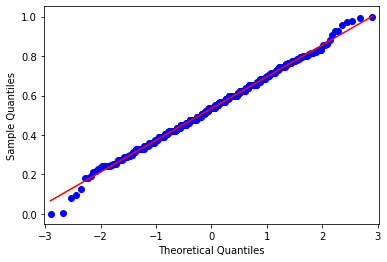

In [ ]:
qqplot(data_nutricion_num2_norm['cadera'] , line='s')
plt.show()

# Segunda Prueba de normalidad

In [ ]:
#Cadera
stat2, p2 = kstest(data_nutricion_num2_norm['cadera'] , 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
#IMC
stat2, p2 = kstest(data_nutricion_num2_norm['IMC'] , 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
#ind_cintura_estatura
stat2, p2 = kstest(data_nutricion_num2_norm['ind_cintura_estatura'] , 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
#masa_corporal_magra_kg
stat2, p2 = kstest(data_nutricion_num2_norm['masa_corporal_magra_kg'] , 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
#pliegue_cutaneo_SUPRAILIACO
stat2, p2 = kstest(data_nutricion_num2_norm['pliegue_cutaneo_SUPRAILIACO'] , 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))


Estadisticos=0.574, p-value=0.000
Estadisticos=0.584, p-value=0.000
Estadisticos=0.552, p-value=0.000
Estadisticos=0.518, p-value=0.000
Estadisticos=0.512, p-value=0.000


OBSERVACIÓN: Se puede decir que con esta normalizacion no se ha logrado el objetivo(normalizar), ninguna de las 5 variables cuantitativas

# Estadarizacion

In [ ]:
data_nutricion_num_estand = zscore(data_nutricion_num, axis=1)
data_nutricion_num_estand

array([[ 1.83534132, -0.45027494, -1.09027496,  0.16615193, -0.46094336],
       [ 1.85574301, -0.35278512, -1.07828775,  0.08673325, -0.51140339],
       [ 1.82030099, -0.35927408, -1.11471865,  0.18382212, -0.53013037],
       ...,
       [ 1.85556258, -0.31097304, -1.07252732,  0.07896655, -0.55102878],
       [ 1.82116411, -0.40559173, -1.08116933,  0.21621522, -0.55061827],
       [ 1.84169915, -0.413869  , -1.13192963,  0.08849579, -0.38439631]])

In [ ]:
# Del array a DataFrame
data_nutricion_num_estand = pd.DataFrame(
    data=data_nutricion_num_estand,
    columns=['cadera','IMC','ind_cintura_estatura','masa_corporal_magra_kg','pliegue_cutaneo_SUPRAILIACO'])
data_nutricion_num_estand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cadera                       545 non-null    float64
 1   IMC                          545 non-null    float64
 2   ind_cintura_estatura         545 non-null    float64
 3   masa_corporal_magra_kg       545 non-null    float64
 4   pliegue_cutaneo_SUPRAILIACO  545 non-null    float64
dtypes: float64(5)
memory usage: 21.4 KB


Graficamos

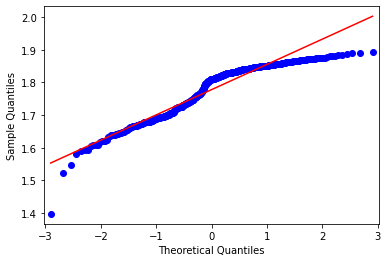

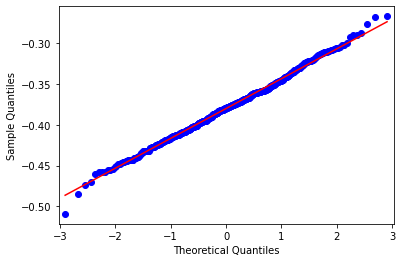

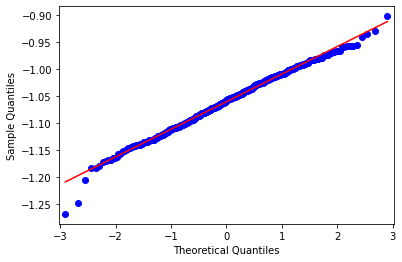

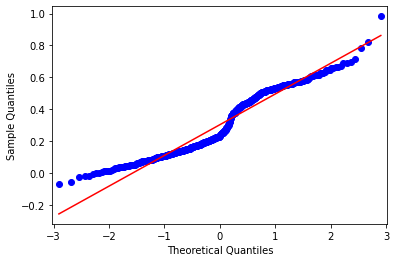

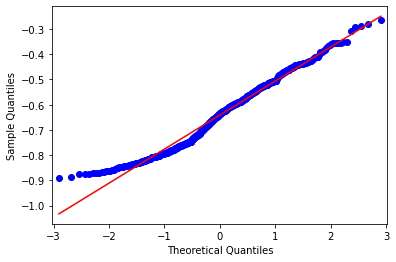

In [ ]:
qqplot(data_nutricion_num_estand['cadera'] , line='s')
qqplot(data_nutricion_num_estand['IMC'] , line='s')
qqplot(data_nutricion_num_estand['ind_cintura_estatura'] , line='s')
qqplot(data_nutricion_num_estand['masa_corporal_magra_kg'] , line='s')
qqplot(data_nutricion_num_estand['pliegue_cutaneo_SUPRAILIACO'] , line='s')
plt.show()

In [ ]:
#Cadera
stat2, p2 = kstest(data_nutricion_num_estand['cadera'] , 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
#IMC
stat2, p2 = kstest(data_nutricion_num_estand['IMC'] , 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
#ind_cintura_estatura
stat2, p2 = kstest(data_nutricion_num_estand['ind_cintura_estatura'] , 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
#masa_corporal_magra_kg
stat2, p2 = kstest(data_nutricion_num_estand['masa_corporal_magra_kg'] , 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
#pliegue_cutaneo_SUPRAILIACO
stat2, p2 = kstest(data_nutricion_num_estand['pliegue_cutaneo_SUPRAILIACO'] , 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))


Estadisticos=0.938, p-value=0.000
Estadisticos=0.608, p-value=0.000
Estadisticos=0.823, p-value=0.000
Estadisticos=0.489, p-value=0.000
Estadisticos=0.628, p-value=0.000


No se ha podido dar una forma normal a el comportamiento de las variables

## Analisis de las correlaciones

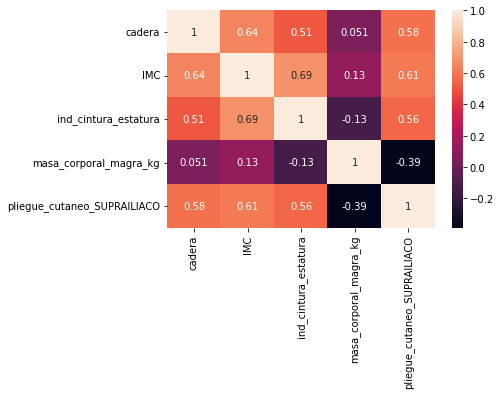

In [ ]:
correlacion = data_nutricion_num.corr()
sns.heatmap(correlacion, annot = True)
plt.show()

Como podemos observar en el mapa de calor no hay mucha correlacion considerando que apartir de 0.05 es alta la correlacion de las variables. Ademas las correlaciones mas altas son las relacionadas con el IMC

## Aplicacion de pruebas a algunas variables numericas

Prueba de correlacion no parametricas

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


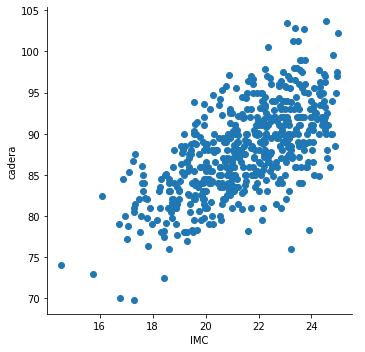

In [ ]:
# Graficamos las variables a correlacionar

sns.FacetGrid(data_nutricion_num, size=5).map(plt.scatter, "IMC", "cadera").add_legend()

In [ ]:
# Correlación spearmanr
from scipy.stats import pearsonr, spearmanr

rho, p = spearmanr(data_nutricion_num['IMC'], data_nutricion_num['cadera'])

print('Correlación Pearson=%.3f, p-value=%.3f' % (rho, p))

Correlación Pearson=0.634, p-value=0.000


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


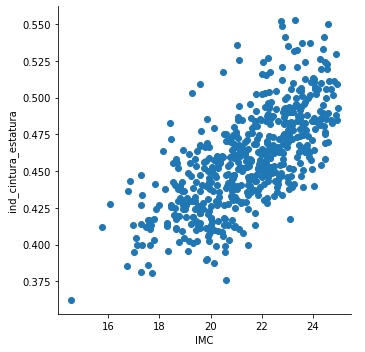

In [ ]:
# Graficamos las variables a correlacionar

sns.FacetGrid(data_nutricion_num, size=5).map(plt.scatter, "IMC", "ind_cintura_estatura").add_legend()

In [ ]:
# Correlación spearmanr
from scipy.stats import pearsonr, spearmanr

rho, p = spearmanr(data_nutricion_num['IMC'], data_nutricion_num['ind_cintura_estatura'])

print('Correlación Pearson=%.3f, p-value=%.3f' % (rho, p))

Correlación Pearson=0.707, p-value=0.000


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


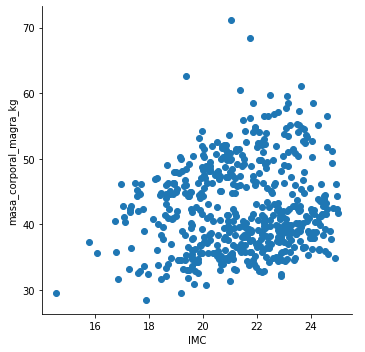

In [ ]:
# Graficamos las variables a correlacionar

sns.FacetGrid(data_nutricion_num, size=5).map(plt.scatter, "IMC", "masa_corporal_magra_kg").add_legend()

In [ ]:
# Correlación spearmanr
from scipy.stats import pearsonr, spearmanr

rho, p = spearmanr(data_nutricion_num['IMC'], data_nutricion_num['masa_corporal_magra_kg'])

print('Correlación Pearson=%.3f, p-value=%.3f' % (rho, p))

Correlación Pearson=0.103, p-value=0.016


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


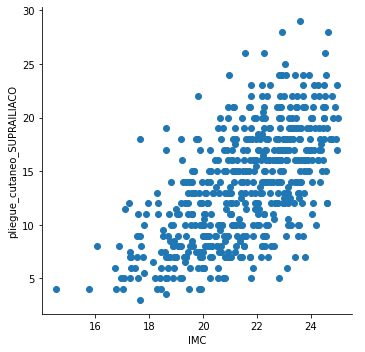

In [ ]:
# Graficamos las variables a correlacionar

sns.FacetGrid(data_nutricion_num, size=5).map(plt.scatter, "IMC", "pliegue_cutaneo_SUPRAILIACO").add_legend()

In [ ]:
# Correlación spearmanr
from scipy.stats import pearsonr, spearmanr

rho, p = spearmanr(data_nutricion_num['IMC'], data_nutricion_num['pliegue_cutaneo_SUPRAILIACO'])

print('Correlación Pearson=%.3f, p-value=%.3f' % (rho, p))

Correlación Pearson=0.618, p-value=0.000


OBSERVACION
Podemos decir que laS 4 variable indendientes estan mutamente dependientes con la variable dependiente (IMC)

# REGRESIÓN LINEAL MULTIPLE

In [ ]:
# Correlación r de pearson
from scipy.stats import pearsonr

r, p = pearsonr(data_nutricion_num['IMC'], data_nutricion_num['cadera'])
print('Correlación Pearson=%.3f, p-value=%.3f' % (r, p))
r, p = pearsonr(data_nutricion_num['IMC'], data_nutricion_num['ind_cintura_estatura'])
print('Correlación Pearson=%.3f, p-value=%.3f' % (r, p))
r, p = pearsonr(data_nutricion_num['IMC'], data_nutricion_num['masa_corporal_magra_kg'])
print('Correlación Pearson=%.3f, p-value=%.3f' % (r, p))
r, p = pearsonr(data_nutricion_num['IMC'], data_nutricion_num['pliegue_cutaneo_SUPRAILIACO'])
print('Correlación Pearson=%.3f, p-value=%.3f' % (r, p))



Correlación Pearson=0.643, p-value=0.000
Correlación Pearson=0.690, p-value=0.000
Correlación Pearson=0.129, p-value=0.002
Correlación Pearson=0.614, p-value=0.000


Como el p-values es menor a 0.05 entonces rechazamos la hipotesis nula, estas 2 variables estaN correlacionadas

In [ ]:
# Variables independientes
X_dat = data_nutricion_num.loc[:, ['cadera','ind_cintura_estatura','masa_corporal_magra_kg','pliegue_cutaneo_SUPRAILIACO']] 
X_dat.head(6)

,cadera,ind_cintura_estatura,masa_corporal_magra_kg,pliegue_cutaneo_SUPRAILIACO
1,100.5,0.485886,43.437664,22.0
2,86.0,0.475876,34.435097,17.0
3,88.4,0.490442,39.384269,18.0
4,97.9,0.496569,40.439521,19.0
6,81.5,0.399401,42.806913,6.0
7,83.2,0.436673,41.235083,11.5


In [ ]:
# variable dependiente
Y_dat = data_nutricion_num.loc[:, ['IMC']] 
Y_dat.head(6)

,IMC
1,22.364707
2,21.623567
3,23.117479
4,22.260196
6,17.318656
7,18.979031


In [ ]:
# Creación del modelo

modelo = LinearRegression()
modelo.fit(X = X_dat, y = Y_dat)

LinearRegression()

In [ ]:
# Información del modelo

modelo = sm.OLS(endog=Y_dat, exog=X_dat,)
modelo = modelo.fit()
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:                    IMC   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          5.245e+04
Date:                Sat, 30 Apr 2022   Prob (F-statistic):                        0.00
Time:                        05:50:53   Log-Likelihood:                         -820.56
No. Observations:                 545   AIC:                                      1649.
Df Residuals:                     541   BIC:                                      1666.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

Logra explicar un 99.7% de IMC del cuerpo con las variables independientes

In [ ]:
# Intervalos de confianza para los coeficientes del modelo

intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']  # Nivel de confianza del 95%
intervalos_ci

,2.5%,97.5%
cadera,0.035653,0.071397
ind_cintura_estatura,19.872806,25.856466
masa_corporal_magra_kg,0.080396,0.112227
pliegue_cutaneo_SUPRAILIACO,0.136882,0.184209


In [ ]:
prediccion = modelo.predict(exog = X_dat)

prediccion = pd.DataFrame(
    data=prediccion,
    columns=['prediccion'])

residuos   = prediccion.prediccion - Y_dat.IMC # estimado- real
residuos

1      1.839679
2     -0.093945
3     -0.489147
4      1.278898
6      1.261839
         ...   
646   -1.400068
647    2.470822
648   -0.961241
649    2.041292
651    0.842443
Length: 545, dtype: float64

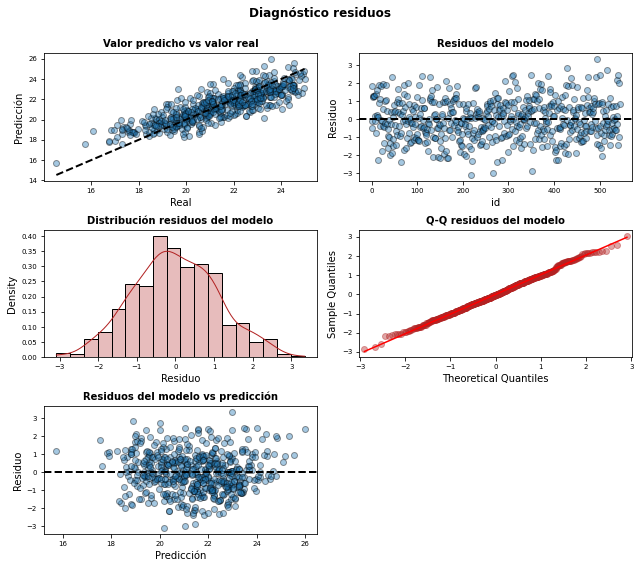

In [ ]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(Y_dat, prediccion.prediccion, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([Y_dat.min(), Y_dat.max()], [Y_dat.min(), Y_dat.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(Y_dat))), residuos ,
                   edgecolors=(0, 0, 0), 
                   alpha = 0.4
                   )
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion.prediccion, residuos,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

Podemos decir que la prediccion si ha explicado gran parte de los datos reales, ya que los residuos son muy pequeños y ademas estan comportandose dentro de un rango 

In [ ]:
# Error de test del modelo 

X_data = sm.add_constant(X_dat, prepend=True)
predicciones = modelo.predict(exog = X_dat)
rmse = mean_squared_error(
        y_true  = Y_dat,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 1.0905365657695476


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


El error entre lo predicho y lo real es 1.09

In [ ]:
# Entrenamiento modelo PCA con escalado de los datos

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(data_nutricion_num)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
componentes = pd.DataFrame(
    data    = modelo_pca.components_,
    columns = data_nutricion_num.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
)

componentes = componentes.transpose()
componentes

,PC1,PC2,PC3,PC4,PC5
cadera,-0.479751,0.200640,-0.637510,-0.562563,-0.081766
IMC,-0.518747,0.272255,0.178031,0.433808,-0.660980
ind_cintura_estatura,-0.492406,0.001307,0.701298,-0.418152,0.301438
masa_corporal_magra_kg,0.091205,0.886966,-0.005309,0.184489,0.413412
pliegue_cutaneo_SUPRAILIACO,-0.499959,-0.314501,-0.264650,0.535206,0.542813


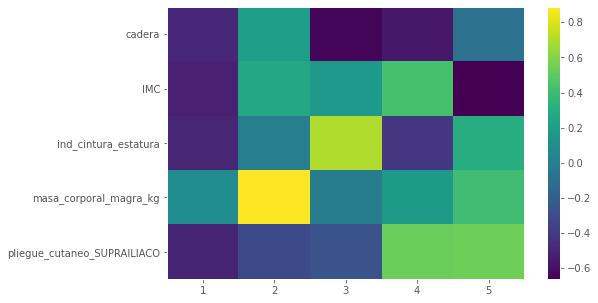

In [ ]:
# Heatmap de los 15 componentes

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(data_nutricion_num.columns)), data_nutricion_num.columns)
plt.xticks(range(len(data_nutricion_num.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.56372304 0.23773959 0.09975231 0.06288261 0.03590245]


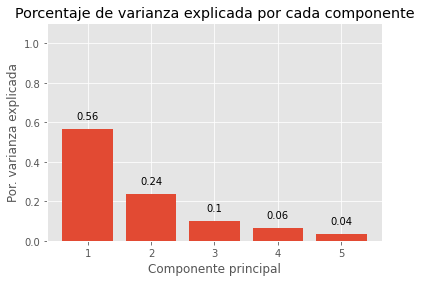

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(data_nutricion_num.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.56372304 0.80146263 0.90121494 0.96409755 1.        ]


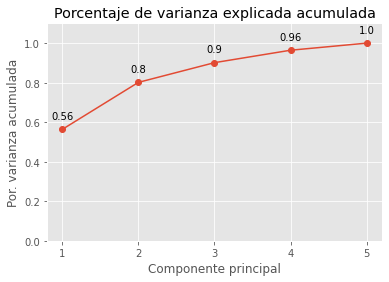

In [ ]:
# Porcentaje de varianza explicada acumulada

prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(data_nutricion_num.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(data_nutricion_num.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

# ANALISIS CLUSTER

In [ ]:
# Estandarización de las variables
# ==============================================================================
datos_scaled = scale(X=data_nutricion_num, axis=0, with_mean=True, with_std=True) 
datos_scaled = pd.DataFrame(datos_scaled, columns=data_nutricion_num.columns, index=data_nutricion_num.index)
datos_scaled.head(4)

,cadera,IMC,ind_cintura_estatura,masa_corporal_magra_kg,pliegue_cutaneo_SUPRAILIACO
1,2.306949,0.483879,0.829954,0.130829,1.634567
2,-0.351629,0.106562,0.535384,-1.203141,0.686462
3,0.088412,0.867119,0.964017,-0.469789,0.876083
4,1.830238,0.430672,1.144326,-0.313426,1.065704


# Cálculo de distancias

In [ ]:


print('------------------')
print('Distancia euclídea')
print('------------------')
distancias = pairwise_distances(
                X      = datos_scaled,
                metric ='euclidean'
             )

# Se descarta la diagonal superior de la matriz
distancias[np.triu_indices(n=distancias.shape[0])] = np.nan

distancias = pd.DataFrame(
                distancias,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias.head(8)

------------------
Distancia euclídea
------------------


,1,2,3,4,6,7,9,10,11,12,...,639,640,642,643,645,646,647,648,649,651
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.158410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.454138,1.236757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.921890,2.484315,1.821363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5.867362,4.054386,4.788349,5.454024,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.381812,2.347335,3.073425,3.898442,1.776678,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5.906880,4.120062,4.829622,5.572956,0.787134,1.881386,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,6.724803,3.875467,4.778450,5.982278,3.237985,3.007290,3.596091,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Los registros mas similares

distancias.melt(ignore_index=False, var_name="estado_b", value_name='distancia') \
    .rename_axis("estado_a") \
    .reset_index() \
    .dropna() \
    .sort_values('distancia') \
    .head(10)

,estado_a,estado_b,distancia
175282,400,382,0.146116
237026,587,510,0.197993
159613,561,347,0.205433
40252,552,90,0.230892
113780,495,248,0.233932
222265,533,481,0.242813
47596,219,107,0.271419
56513,448,126,0.274856
16020,257,37,0.278066
87589,461,196,0.280230


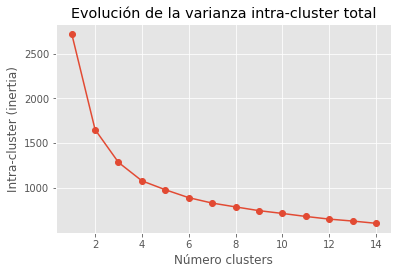

In [ ]:
# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(datos_scaled)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

In [ ]:
# Clasificación con el modelo kmeans

y_predict = modelo_kmeans.predict(X=datos_scaled)

In [ ]:
kmeans = KMeans(n_clusters=4).fit(datos_scaled)
centroids = kmeans.cluster_centers_
print(centroids)


[[-0.04298917 -0.18538677 -0.16602878 -0.81163099  0.38760343]
 [ 0.06859814  0.3149145  -0.02884379  1.34539908 -0.50096198]
 [-1.08475361 -1.21991187 -0.99961551  0.01002259 -1.05505583]
 [ 0.94465711  0.9918817   1.06291643 -0.37438276  0.99301626]]


In [ ]:
kmeans.n_clusters


4

In [ ]:
# El cluster en nuestro DataFrame
cluster = kmeans.predict(datos_scaled)
cluster

array([3, 0, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 3, 3, 3, 2, 3, 2, 2,
       2, 2, 3, 1, 0, 2, 1, 1, 3, 2, 2, 3, 0, 3, 1, 0, 0, 1, 2, 0, 3, 0,
       2, 3, 1, 2, 3, 1, 3, 1, 3, 2, 0, 3, 3, 1, 2, 2, 1, 0, 0, 1, 1, 3,
       3, 0, 3, 0, 0, 2, 2, 1, 3, 3, 3, 0, 1, 0, 3, 3, 0, 1, 3, 3, 0, 2,
       2, 1, 2, 0, 3, 1, 2, 1, 0, 1, 0, 0, 1, 3, 0, 2, 1, 3, 3, 2, 3, 0,
       1, 3, 1, 0, 3, 0, 1, 3, 1, 3, 1, 3, 1, 1, 1, 2, 0, 2, 1, 0, 2, 2,
       0, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 0, 1, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 3, 2, 0, 0, 3, 2, 2, 1, 3, 2, 1, 3, 2, 2, 3, 2, 2, 0, 3,
       3, 3, 3, 3, 2, 2, 3, 0, 2, 2, 2, 3, 0, 2, 2, 2, 0, 3, 2, 2, 3, 0,
       1, 3, 2, 3, 0, 0, 2, 3, 3, 2, 2, 3, 3, 2, 0, 2, 2, 1, 1, 3, 3, 0,
       0, 3, 2, 0, 0, 3, 2, 0, 2, 0, 3, 0, 3, 3, 3, 2, 3, 1, 3, 3, 3, 2,
       1, 2, 1, 1, 3, 3, 3, 1, 3, 1, 2, 2, 1, 1, 1, 2, 3, 3, 2, 0, 1, 1,
       0, 1, 1, 1, 3, 1, 0, 3, 1, 1, 3, 3, 2, 2, 2, 0, 0, 2, 1, 1, 0, 3,
       1, 1, 0, 0, 1, 0, 1, 3, 1, 0, 1, 2, 1, 1, 1,

Clusters en la dataframe

In [ ]:
data_nutricion_num['cluster'] = cluster
data_nutricion_num.head()

,cadera,IMC,ind_cintura_estatura,masa_corporal_magra_kg,pliegue_cutaneo_SUPRAILIACO,cluster
1,100.5,22.364707,0.485886,43.437664,22.0,3
2,86.0,21.623567,0.475876,34.435097,17.0,0
3,88.4,23.117479,0.490442,39.384269,18.0,3
4,97.9,22.260196,0.496569,40.439521,19.0,3
6,81.5,17.318656,0.399401,42.806913,6.0,2


In [ ]:
# Tabla de frecuencia del Cluster
cluster_count = (data_nutricion_num
                       .groupby("cluster")
                       .agg(frequency=("cluster", "count")))

cluster_count["Acumulado"] = cluster_count["frequency"].cumsum()
cluster_count

,frequency,Acumulado
cluster,,
0,138,138
1,124,262
2,133,395
3,150,545
